<a href="https://colab.research.google.com/github/sushantkas/Data-Science/blob/main/GOLD_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Gold_data.csv to Gold_data (3).csv


In [ ]:
df=pd.read_csv("Gold_data.csv")

In [ ]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [ ]:
df.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


# EDA

In [ ]:
df.shape

(2182, 2)

In [ ]:
print(f"Date range of gold prices available from - {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df)-1]}")

Date range of gold prices available from - 2016-01-01 to 2021-12-21


In [ ]:
from datetime import datetime, timedelta
  
def date_range(start, end):
    delta = end - start
    days = [start + timedelta(days=i) for i in range(delta.days + 1)]
    return days
  
startDate = datetime(2016, 1, 1)
endDate = datetime(2021, 12, 21)
      
datesRange = date_range(startDate, endDate);
print(datesRange);

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0), datetime.datetime(2016, 1, 3, 0, 0), datetime.datetime(2016, 1, 4, 0, 0), datetime.datetime(2016, 1, 5, 0, 0), datetime.datetime(2016, 1, 6, 0, 0), datetime.datetime(2016, 1, 7, 0, 0), datetime.datetime(2016, 1, 8, 0, 0), datetime.datetime(2016, 1, 9, 0, 0), datetime.datetime(2016, 1, 10, 0, 0), datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2016, 1, 12, 0, 0), datetime.datetime(2016, 1, 13, 0, 0), datetime.datetime(2016, 1, 14, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 16, 0, 0), datetime.datetime(2016, 1, 17, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 19, 0, 0), datetime.datetime(2016, 1, 20, 0, 0), datetime.datetime(2016, 1, 21, 0, 0), datetime.datetime(2016, 1, 22, 0, 0), datetime.datetime(2016, 1, 23, 0, 0), datetime.datetime(2016, 1, 24, 0, 0), datetime.datetime(2016, 1, 25, 0, 0), datetime.datetime(2016, 1, 26, 0, 0), datetime.datetime(20

In [ ]:
df['month'] = datesRange
df.drop('date',axis=1,inplace=True)
df = df.set_index('month')
df.head()

,price
month,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [ ]:
df1=df

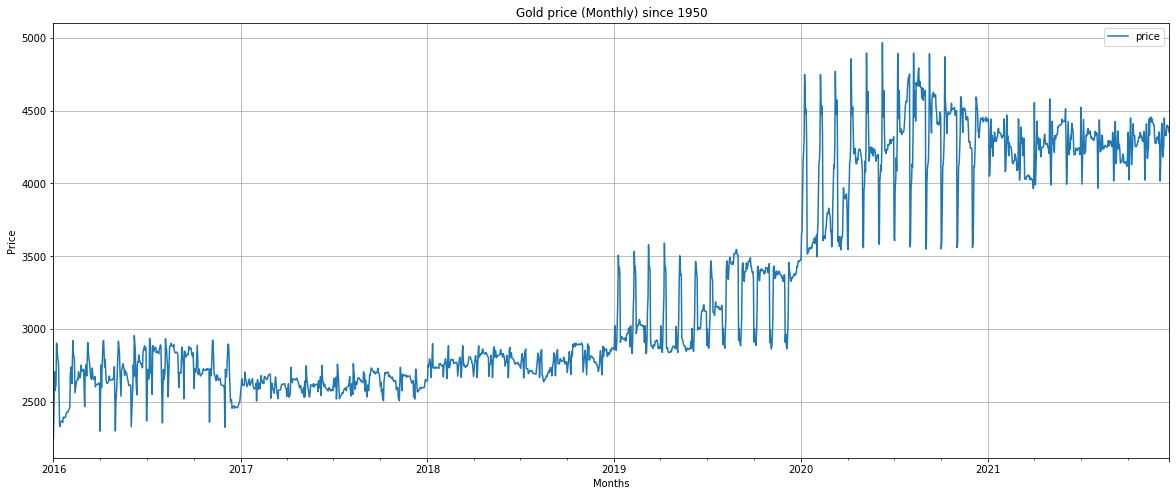

In [ ]:
df.plot(figsize=(20,8))
plt.title("Gold price (Monthly) since 1950")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

In [ ]:
round(df.describe(),3)

,price
count,2182.000
mean,3284.450
std,719.564
min,2252.600
25%,2697.020
50%,2879.800
75%,4147.325
max,4966.300


The Average gold price in last 70 years is $3284.450

Only 25% of the time, the gold price is above $4147.325

Highest Gold price ever touched is $4966.300

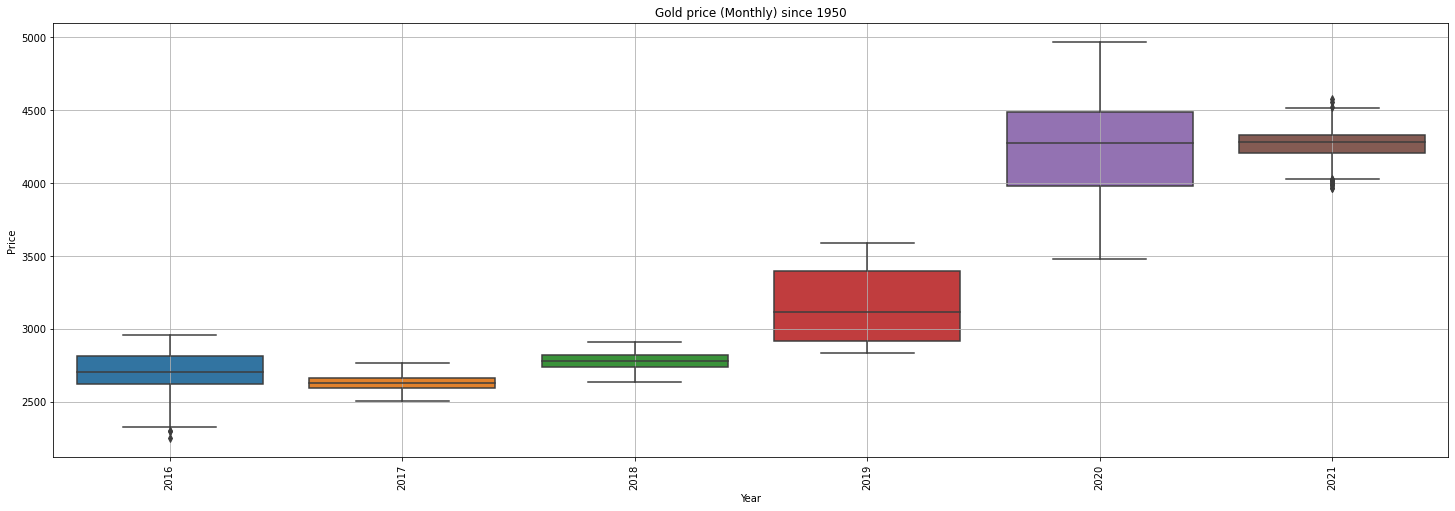

In [ ]:
#visualisation
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title("Gold price (Monthly) since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

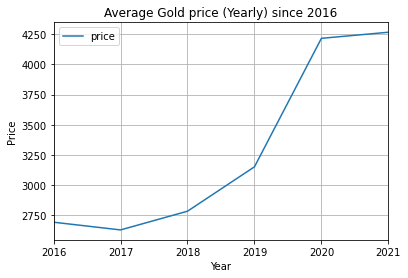

In [ ]:
# Average gold price per year trend since 2016
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Average Gold price (Yearly) since 2016")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

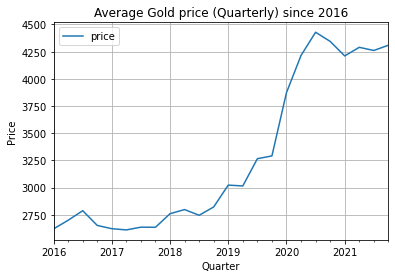

In [ ]:
# Average gold price per quarter trend since 2016
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Average Gold price (Quarterly) since 2016")
plt.xlabel("Quarter")
plt.ylabel("Price")
plt.grid()

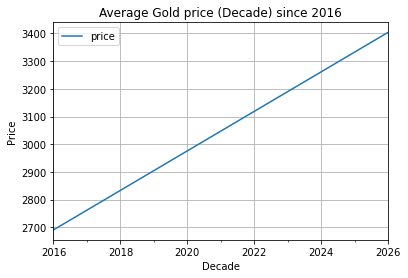

In [ ]:
# Average gold price per decade trend since 2016
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Average Gold price (Decade) since 2016")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()

In [ ]:
# Coefficient of variation in price
df_1 = df.groupby(df.index.year).mean().rename(columns={'price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'price':'Std'}),left_index=True,right_index=True)
df_1['CoV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,CoV_pct
month,,,
2016,2690.614162,146.639798,5.45
2017,2626.676484,50.634343,1.93
2018,2781.938082,60.387230,2.17
2019,3150.210685,236.765777,7.52
2020,4216.378689,362.345350,8.59


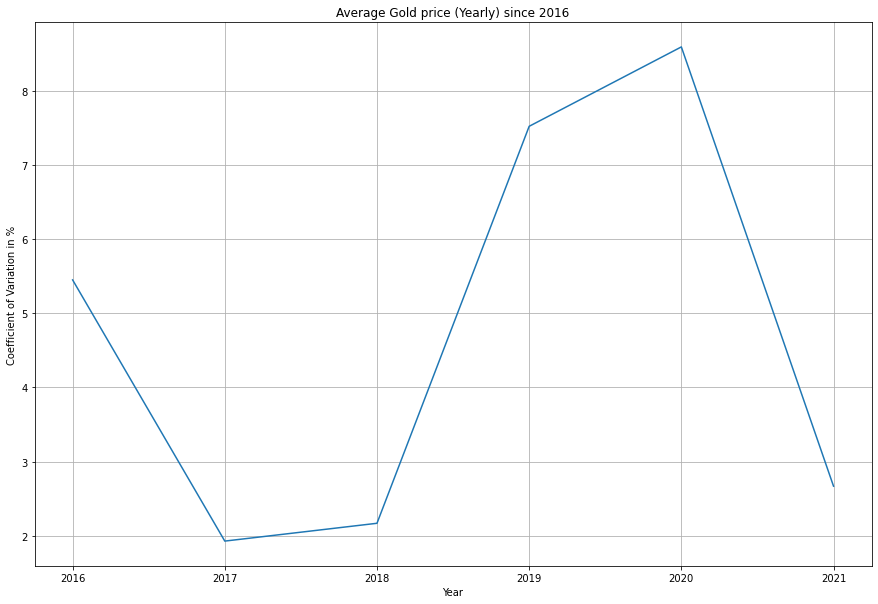

In [ ]:
# Average gold price per year trend since 2016
fig, ax = plt.subplots(figsize=(15,10))
df_1['CoV_pct'].plot();
plt.title("Average Gold price (Yearly) since 2016")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation in %")
plt.grid()

Inference

The CV value reached its highest in year 2020 near to 25%, which could have made the asset as highly risky
But in 2021, the CV value is closer to 5%, which makes the asset viable for good investment

In [ ]:
train = df1['2016-01-01':'2021-09-14']
valid = df1['2021-09-15':'2021-12-21']

In [ ]:
valid1=valid

In [ ]:
df

,price
month,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [ ]:
train.shape,valid.shape

((2084, 1), (98, 1))

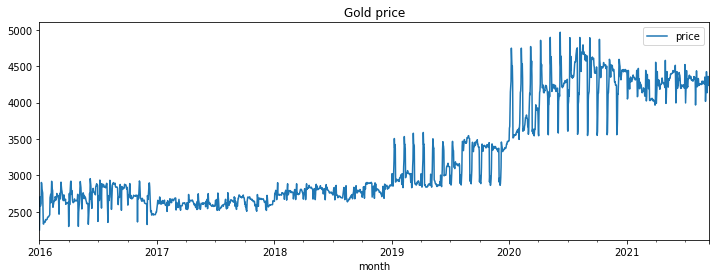

In [ ]:
#plot time series data
train['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Gold price')
plt.show(block=False)

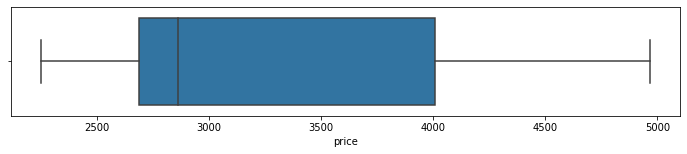

In [ ]:
#Outlier detection
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=train['price'],whis=1.5)

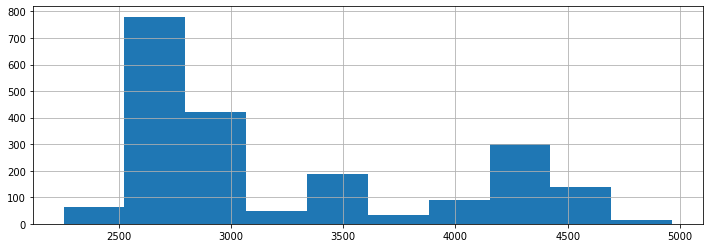

In [ ]:
fig = train.price.hist(figsize = (12,4))

# Time series Decomposititon

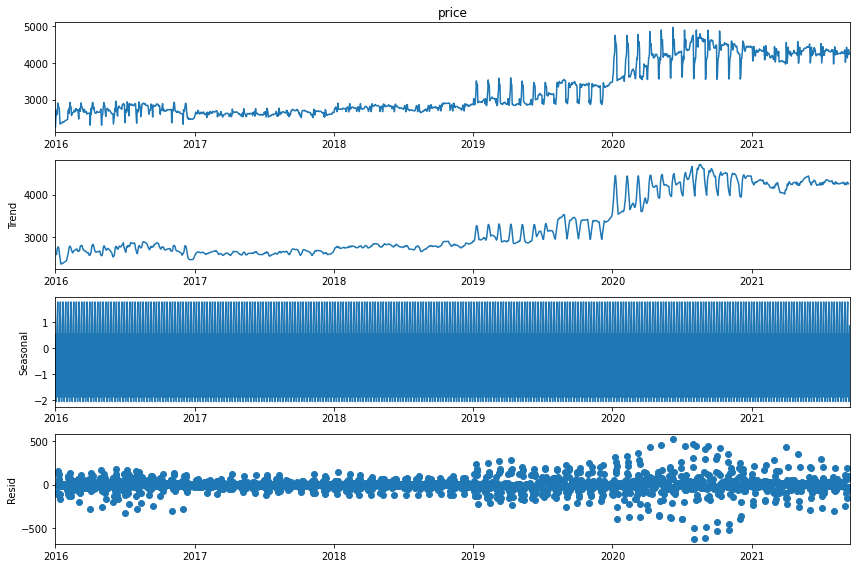

In [ ]:
#Additive Seasonal Decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train['price'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

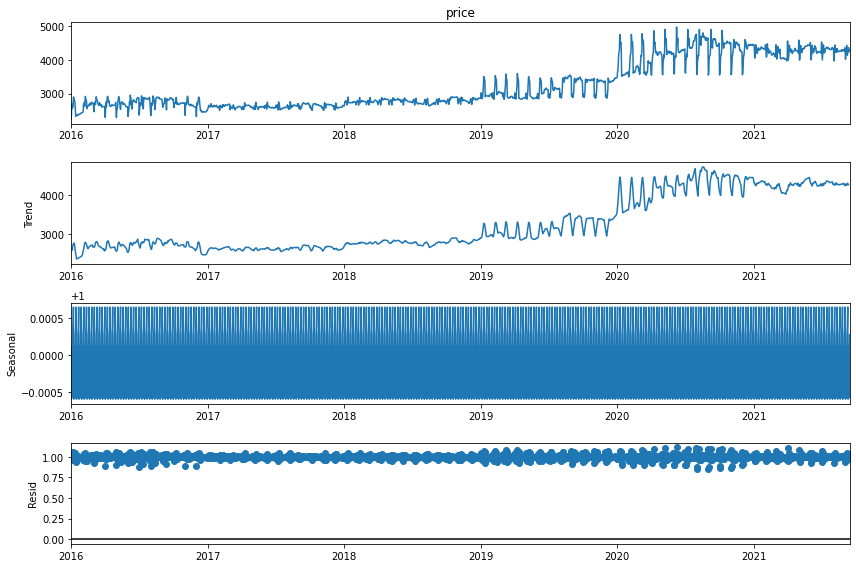

In [ ]:
#Multiplicative Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(train['price'], model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
train_len = train.shape[0]
train_len

2084

#Time Series Methods(Model Building) 

Naive Method

In [ ]:
y_hat_naive = valid.copy()
y_hat_naive['naive_forecast'] = train['price'][train_len-1]

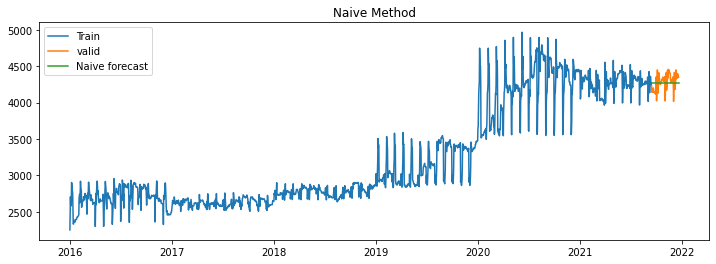

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
#calculating RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_naive['naive_forecast'])/valid['price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99


Simple Average Method

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['avg_forecast'] = train['price'].mean()

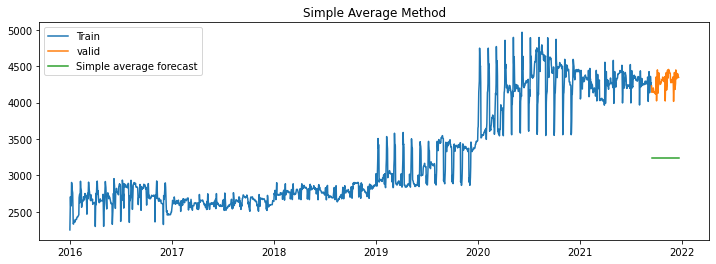

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_avg['avg_forecast'])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40


Simple Moving Average Method

In [ ]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

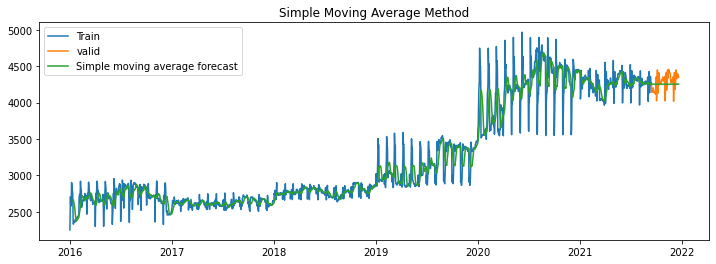

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_sma['sma_forecast'][train_len:])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09


Exponential Smoothing methods

simple exponential smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['price'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = valid.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(valid))
y_hat_ses[y_hat_ses['ses_forecast'].isnull()]
y_hat_ses['ses_forecast'].fillna(y_hat_ses['ses_forecast'].mean(),inplace=True)

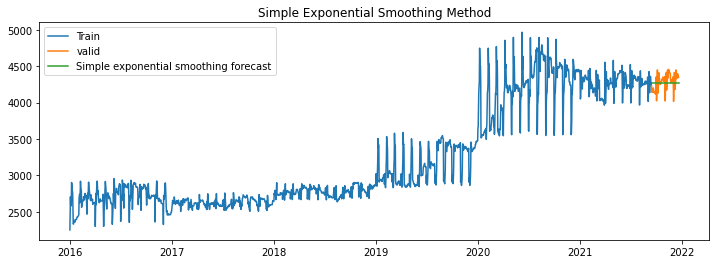

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_ses['ses_forecast'])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98


Holt's Method with trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.1, smoothing_slope=0.001, optimized=False)
print(model_fit.params)
y_hat_holt = valid.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(valid))

{'smoothing_level': 0.1, 'smoothing_trend': 0.001, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 2252.6, 'initial_trend': 201.9000000000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


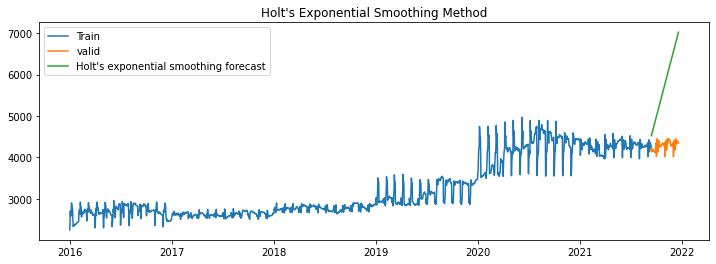

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_holt['holt_forecast'])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63


Holt Winter's Additive Method with trend and Seasonality

In [ ]:
y_hat_hwa = valid.copy()
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(valid))

{'smoothing_level': 0.8889285714285714, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0863888888888889, 'damping_trend': nan, 'initial_level': 3237.90316091954, 'initial_trend': -23.902430555555565, 'initial_seasons': array([-985.30316092, -783.40316092, -529.80316092, -660.10316092,
       -640.15316092, -620.20316092, -334.10316092, -350.10316092,
       -424.10316092, -451.10316092, -478.10316092, -688.90316092]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


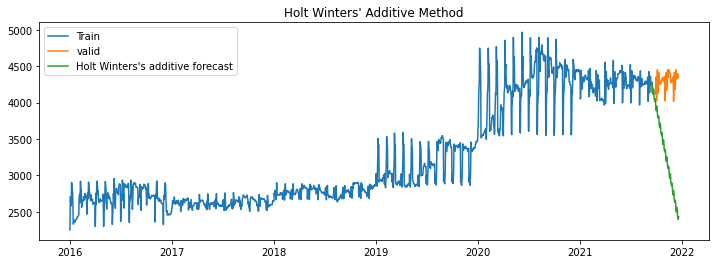

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_hwa['hw_forecast'])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23


Holt Winter's multiplicative method with trend and seasonality

In [ ]:
y_hat_hwm = valid.copy()
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=2 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(valid))
y_hat_hwm['hw_forecast'].isnull().sum()

{'smoothing_level': 0.9242857107706159, 'smoothing_trend': 0.03423280748752494, 'smoothing_seasonal': 0.04326530825448147, 'damping_trend': nan, 'initial_level': 3238.3911283183074, 'initial_trend': 144.69998907766038, 'initial_seasons': array([0.77553549, 0.76826496]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


0

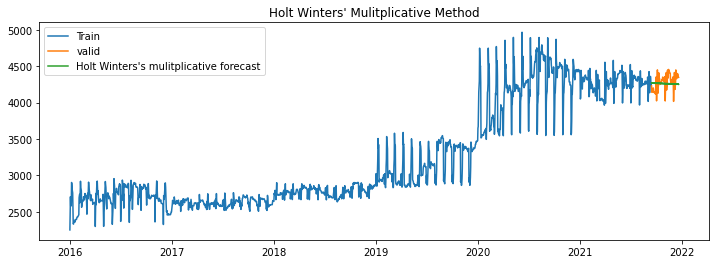

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_hwm['hw_forecast'])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09


Auto regressive Methods

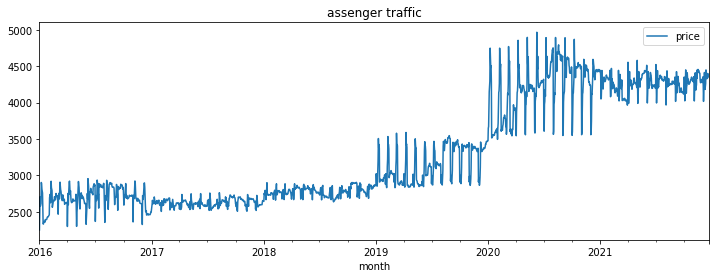

In [ ]:
#Stationary vs non-stationary Time series
df['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('assenger traffic')
plt.show(block=False)

In [ ]:
#ADF test(Augmented Dickey_fuller test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['price'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.309904
Critical Values @ 0.05: -2.86
p-value: 0.924090


In [ ]:
#Kwiatkowski-Phillips-Schmidt_shin(Kpss)test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['price'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 7.218406
Critical Values @ 0.05: 0.46
p-value: 0.010000


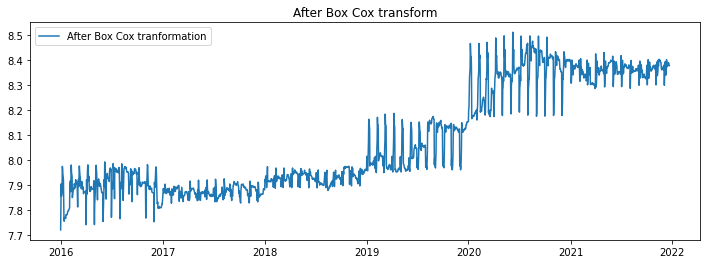

In [ ]:
#Box Cox transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df1['price'], lmbda=0), index = df1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [ ]:
data_boxcox

month
2016-01-01    7.719840
2016-01-02    7.805678
2016-01-03    7.904003
2016-01-04    7.854692
2016-01-05    7.862401
                ...   
2021-12-17    8.388086
2021-12-18    8.386971
2021-12-19    8.386971
2021-12-20    8.378873
2021-12-21    8.377126
Length: 2182, dtype: float64

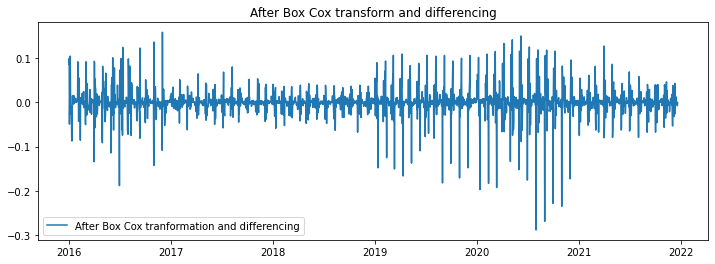

In [ ]:
#Difference to remove trend
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(1), df1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [ ]:
data_boxcox_diff.dropna(inplace=True)

In [ ]:
data_boxcox_diff.tail()

month
2021-12-17   -0.001228
2021-12-18   -0.001116
2021-12-19    0.000000
2021-12-20   -0.008097
2021-12-21   -0.001747
dtype: float64

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -21.394232
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [ ]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.027648
Critical Values @ 0.05: 0.46
p-value: 0.100000


Autocorrelation Function(ACF)

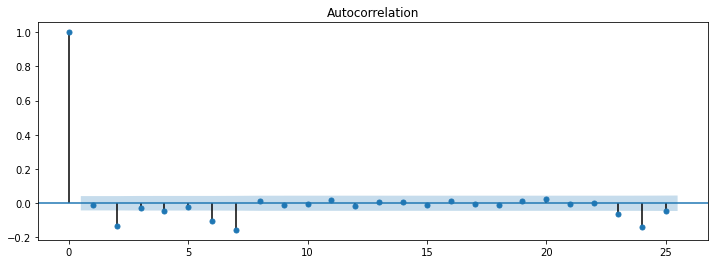

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 25)
plt.show()

Partial autocorrealtion function(PACF)

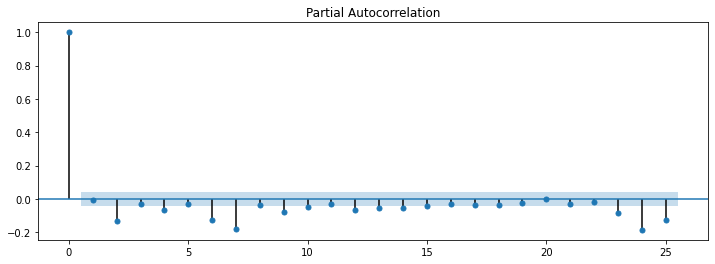

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 25)
plt.show()

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
valid_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
valid_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [ ]:
train_data_boxcox_diff

month
2016-01-02    0.085838
2016-01-03    0.098324
2016-01-04   -0.049311
2016-01-05    0.007709
2016-01-06    0.007650
                ...   
2021-09-10    0.000260
2021-09-11    0.028381
2021-09-12   -0.010838
2021-09-13   -0.018085
2021-09-14    0.007808
Length: 2083, dtype: float64

Auto Regression Method(AR)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(2, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.000294
ar.L1    -0.014262
ar.L2    -0.130281
sigma2    0.001031
dtype: float64


In [ ]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

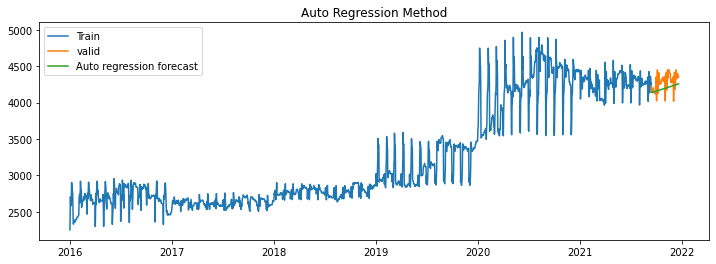

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_ar['ar_forecast'][valid.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_ar['ar_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_ar['ar_forecast'][valid.index.min():])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09
0,Autoregressive (AR) method,125.92,2.42


Moving Average(MA)

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 2)) 
model_fit = model.fit()
print(model_fit.params)

const     0.000289
ma.L1    -0.025070
ma.L2    -0.160670
sigma2    0.001027
dtype: float64


In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

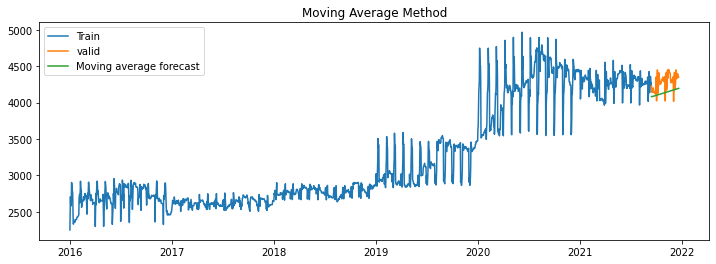

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['price'][:train_len], label='Train')
plt.plot(df['price'][train_len:], label='valid')
plt.plot(y_hat_ma['ma_forecast'][valid.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_ma['ma_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_ma['ma_forecast'][valid.index.min():])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09
0,Autoregressive (AR) method,125.92,2.42
0,Moving Average (MA) method,172.51,3.56


Auto regression moving average method(ARMA)

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.000252
ar.L1     0.786475
ma.L1    -0.971342
sigma2    0.000963
dtype: float64


In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

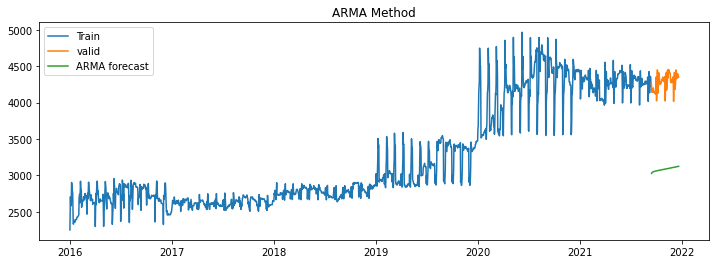

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( df['price'][:train_len-1], label='Train')
plt.plot(df['price'][train_len-1:], label='valid')
plt.plot(y_hat_arma['arma_forecast'][valid.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_arma['arma_forecast'][train_len-1:])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09
0,Autoregressive (AR) method,125.92,2.42
0,Moving Average (MA) method,172.51,3.56
0,Autoregressive moving average (ARMA) method,1201.61,27.93


Auto Regressive Integrated moving average(ARIMA)

In [ ]:
model = ARIMA(data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const     0.000299
ar.L1    -0.009361
sigma2    0.001021
dtype: float64


In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

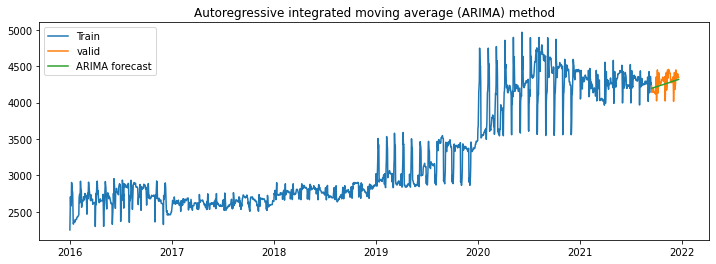

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(valid['price'], label='valid')
plt.plot(y_hat_arima['arima_forecast'][valid.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['price'], y_hat_arima['arima_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['price']-y_hat_arima['arima_forecast'][valid.index.min():])/valid['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09
0,Autoregressive (AR) method,125.92,2.42
0,Moving Average (MA) method,172.51,3.56
0,Autoregressive moving average (ARMA) method,1201.61,27.93


SARIMA(Seasonal Auto Regressive Integratted Moving Average)

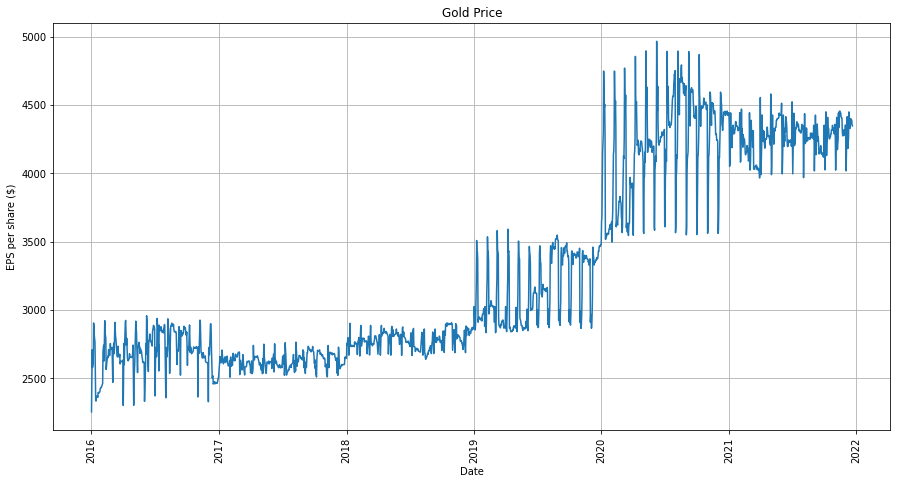

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['price'])
plt.title('Gold Price')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

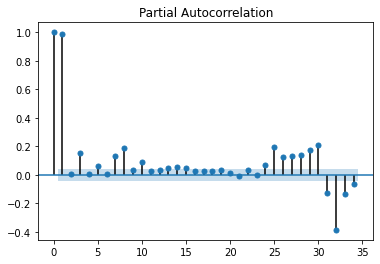

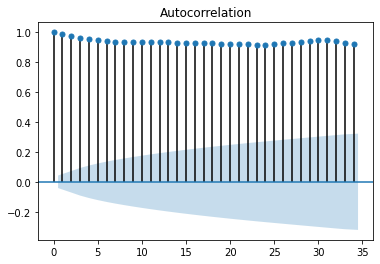

In [ ]:
plot_pacf(df['price']);
plot_acf(df['price']);

In [ ]:
ad_fuller_result = adfuller(df['price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.3099036570504765
p-value: 0.9240899189079188



Since the p-value is large, we cannot reject the null hypothesis and must assume that the time series is non-stationary.

In [ ]:
df['price'] = np.log(df['price'])
df['price'] = df['price'].diff()
df = df.drop(df.index[0])

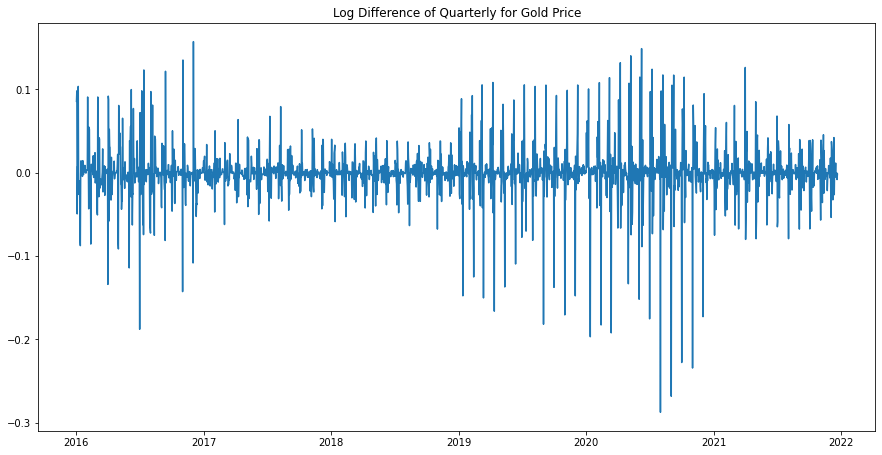

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['price'])
plt.title("Log Difference of Quarterly for Gold Price")
plt.show()

In [ ]:
df

,price
month,
2016-01-02,0.085838
2016-01-03,0.098324
2016-01-04,-0.049311
2016-01-05,0.007709
2016-01-06,0.007650
...,...
2021-12-17,-0.001228
2021-12-18,-0.001116
2021-12-19,0.000000


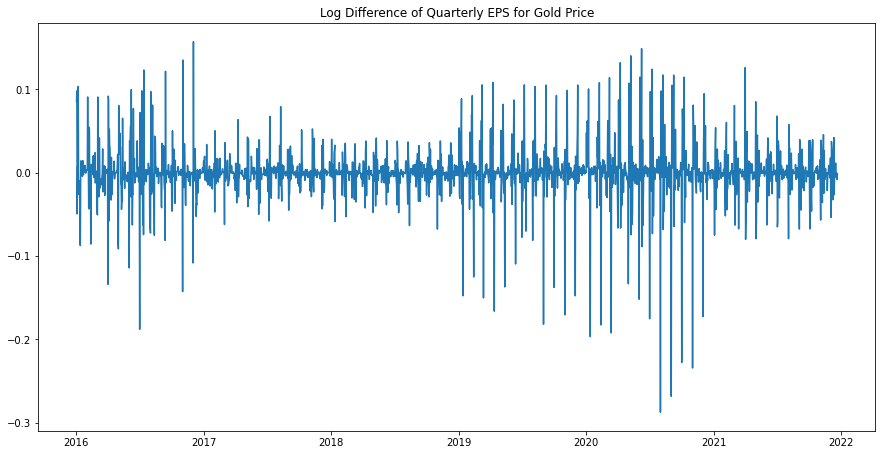

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['price'])
plt.title("Log Difference of Quarterly EPS for Gold Price")
plt.show()

In [ ]:
ad_fuller_result = adfuller(df['price'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -21.39423214391702
p-value: 0.0


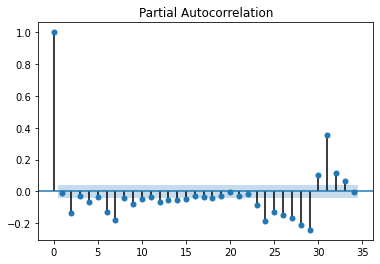

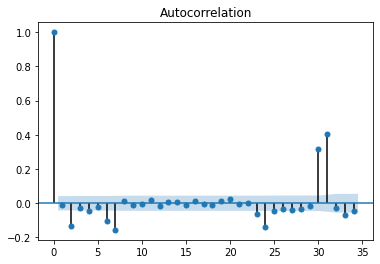

In [ ]:
plot_pacf(df['price']);
plot_acf(df['price']);

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, df['price'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(3, 2, 3, 3)",-8829.044193
1,"(3, 2, 2, 3)",-8811.099430
2,"(0, 3, 0, 2)",-8810.394965
3,"(0, 3, 1, 1)",-8809.906585
4,"(0, 3, 0, 3)",-8808.057197
...,...,...
251,"(3, 0, 0, 0)",-6711.002059
252,"(2, 0, 0, 0)",-6642.514220
253,"(0, 0, 1, 0)",-6542.032011
254,"(1, 0, 0, 0)",-6317.939453


In [ ]:
best_model = SARIMAX(df['price'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())#

                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                 2181
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 4)   Log Likelihood                4384.989
Date:                           Wed, 11 Jan 2023   AIC                          -8759.977
Time:                                   08:34:33   BIC                          -8731.551
Sample:                               01-02-2016   HQIC                         -8749.584
                                    - 12-21-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0154      0.027    -37.001      0.000      -1.069      -0.962
ma.L2          0.0160      0.016      0.985

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)) 
model_fit = model.fit()
print(model_fit.params)

ma.L1     -0.034874
ma.L2     -0.161383
ma.S.L4   -1.067069
ma.S.L8    0.069245
sigma2     0.001026
dtype: float64


In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [ ]:
rmse = np.sqrt(mean_squared_error(valid1['price'], y_hat_sarima['sarima_forecast'][valid1.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid1['price']-y_hat_sarima['sarima_forecast'][valid1.index.min():])/valid1['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,103.07,1.99
0,Simple average method,1052.14,24.40
0,Simple moving average forecast,106.48,2.09
0,Simple exponential smoothing forecast,102.81,1.98
0,Holt's exponential smoothing method,1638.12,34.63
0,Holt Winters' additive method,1128.72,22.23
0,Holt Winters' multiplicative method,106.72,2.09
0,Autoregressive (AR) method,125.92,2.42
0,Moving Average (MA) method,172.51,3.56
0,Autoregressive moving average (ARMA) method,1201.61,27.93


In [ ]:
df

,price
month,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# Model Evaluation

choosing ARIMA Model for evaluation because, it's have lowest MAPE 1.76% which is more accurate to when compare to other models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df['price'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2181
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4409.333
Date:                Wed, 11 Jan 2023   AIC                          -8810.667
Time:                        02:40:10   BIC                          -8787.918
Sample:                    01-02-2016   HQIC                         -8802.350
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9991      0.163     -6.113      0.000      -1.319      -0.679
ma.L1         -0.0009     32.006  -2.78e-05      1.000     -62.732      62.730
ma.L2         -0.9991     31.988     -0.031      0.9

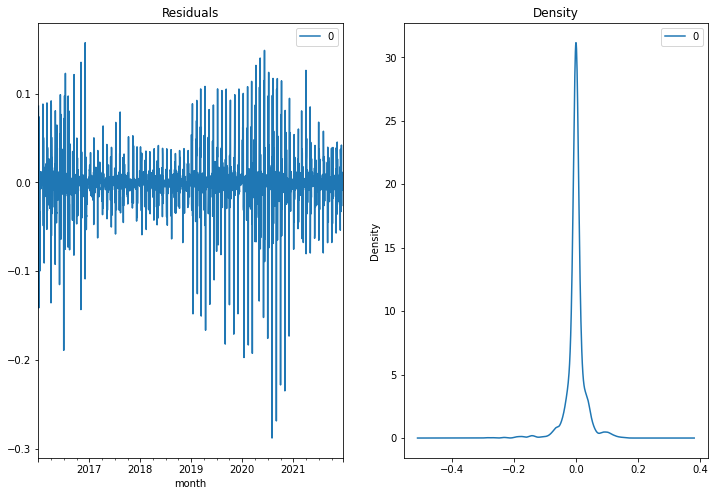

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=4.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=5.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=6.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=9.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=3.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=6.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=6.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=3.63 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.593, Time=4.04 sec
 ARIMA(4,1,2)(0,0,0

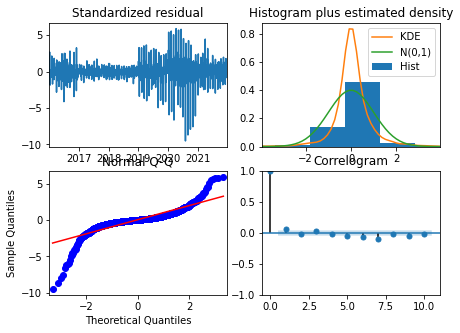

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['price'], trace=True,suppress_warnings=True)
stepwise_fit.plot_diagnostics(figsize=(7,5))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=26602.672, Time=5.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=26849.714, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=26852.847, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=26852.425, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=26847.869, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=26624.351, Time=4.74 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=26624.816, Time=5.28 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=26571.973, Time=21.19 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=26576.751, Time=13.28 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=26572.084, Time=19.05 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=26574.176, Time=17.82 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=26581.067, Time=12.88 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=26585.188, Time=16.86 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=26573.747, Time=20.22 se

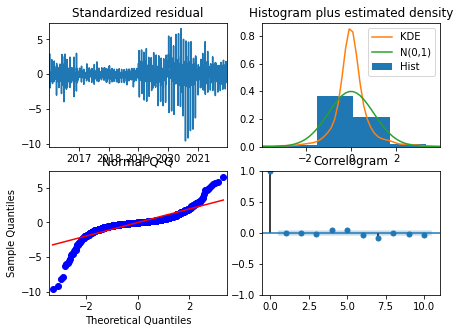

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['price'], trace=True,seasonal=True,m=12,suppress_warnings=True)
stepwise_fit.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(df.shape)
train_1=df.iloc[:-98]
test=df.iloc[-98:]
print(train_1.shape,test.shape)

(2182, 1)
(2084, 1) (98, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_1['price'],order=(5,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 2084
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -12701.247
Date:                Wed, 11 Jan 2023   AIC                          25424.494
Time:                        08:42:06   BIC                          25486.551
Sample:                    01-01-2016   HQIC                         25447.233
                         - 09-14-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4580      0.020    -22.814      0.000      -0.497      -0.419
ar.L2         -0.4713      0.026    -18.293      0.000      -0.522      -0.421
ar.L3          0.0311      0.029      1.063      0.288      -0.026       0.088
ar.L4          0.0946      0.022      4.314      0.000       0.052       0.138
ar.L5          0.7979      0.016     50.505      0.000       0.767       0.829
ma.L1          0.3429      0.020     17.127      0.000       0.304       0.382
ma.L2          0.2354      0.023     10.281      0.000       0.190       0.280
ma.L3         -0.2474      0.023    -10.780      0.000      -0.292      -0.202
ma.L4         -0.2829      0.022    -12.857      0.000      -0.326      -0.240
ma.L5         -0.8963      0.017    -53.238      0.000      -0.929      -0.863
sigma2      1.214e+04    189.453     64.102      0.000    1.18e+04    1.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.50   Jarque-Bera (JB):             36758.12
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               4.54   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#only for train data
import pmdarima as pm
from pmdarima import auto_arima
auto_arima = pm.auto_arima(train_1['price'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2084
Model:               SARIMAX(4, 1, 1)   Log Likelihood              -12722.350
Date:                Wed, 11 Jan 2023   AIC                          25458.701
Time:                        08:44:03   BIC                          25498.192
Sample:                    01-01-2016   HQIC                         25473.171
                         - 09-14-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2324      0.105      2.222      0.026       0.027       0.437
ar.L1          0.8707      0.019     45.232      0.000       0.833       0.908
ar.L2         -0.1624      0.025     -6.446      0.000      -0.212      -0.113
ar.L3          0.1330      0.026      5.081      0.000       0.082       0.184
ar.L4         -0.1144      0.020     -5.729      0.000      -0.153      -0.075
ma.L1         -0.9629      0.008   -119.859      0.000      -0.979      -0.947
sigma2      1.181e+04    120.778     97.793      0.000    1.16e+04     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             46809.84
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.74   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

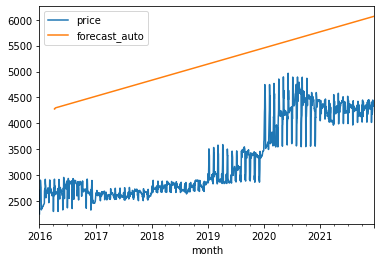

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(train_1))
df['forecast_auto'] = [None]*len(test) + list(forecast_test_auto)
df.plot()

In [ ]:
df

,price,forecast_auto
month,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,NaN
2016-01-03,2708.10,NaN
2016-01-04,2577.80,NaN
2016-01-05,2597.75,NaN
...,...,...
2021-12-17,4394.40,6062.684310
2021-12-18,4389.50,6063.535497
2021-12-19,4389.50,6064.386685


Inference:
the predictions is to far from the actual price while using ARIMA model so we move on SARIMA model.

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['price'],order=(3,1,3),seasonal_order=(2,0,2,12))
result=model.fit()

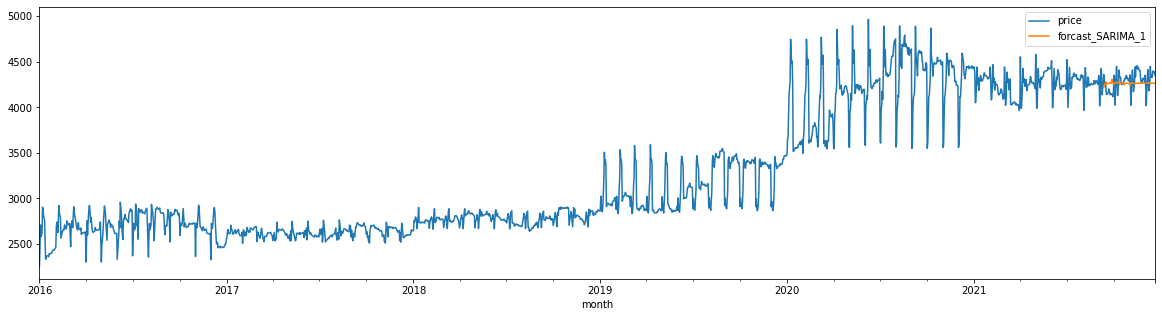

In [ ]:
df['forcast_SARIMA_1']=result.predict(start=2080, end=2182, dynamic=True)
df[['price','forcast_SARIMA_1']].plot(figsize=(20, 5))

In [ ]:
df

,price,forcast_SARIMA_1
month,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,NaN
2016-01-03,2708.10,NaN
2016-01-04,2577.80,NaN
2016-01-05,2597.75,NaN
...,...,...
2021-12-17,4394.40,4265.411615
2021-12-18,4389.50,4265.294645
2021-12-19,4389.50,4264.702269


#Future forecasting

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2021-12-21", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future_prediction])

In [ ]:
df.shape

(2206, 2)

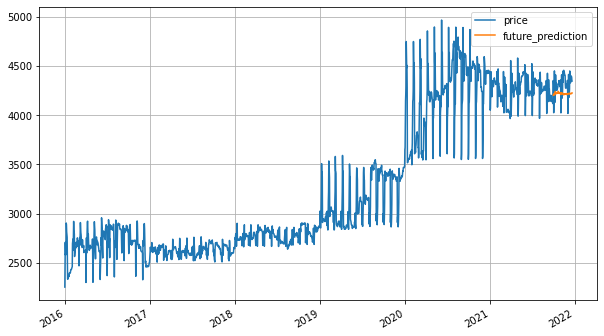

In [ ]:
df['future_prediction']=result.predict(start=2100, end=2182, dynamic=True)
df[['price','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(3, 1, 3),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3980      0.547      0.728      0.467      -0.674       1.470
ar.L2          0.2309      0.162      1.429      0.153      -0.086       0.548
ar.L3          0.0315      0.238      0.132      0.895      -0.434       0.497
ma.L1         -0.5316      0.546     -0.974      0.330      -1.601       0.538
ma.L2         -0.4373      0.205     -2.128      0.033      -0.840      -0.035
ma.L3          0.0304      0.356      0.085      0.932      -0.667       0.728
ar.S.L12       0.5669      0.112      5.053      0.000       0.347       0.787
ar.S.L24      -0.5138      0.070     -7.348      0.000      -0.651      -0.377
ma.S.L12      -0.6106      0.121     -5.063      0.000      -0.847      -0.374
ma.S.L24       0.3841      0.080      4.822      0.000       0.228       0.540
sigma2      1.196e+04    163.135     73.307      0.0

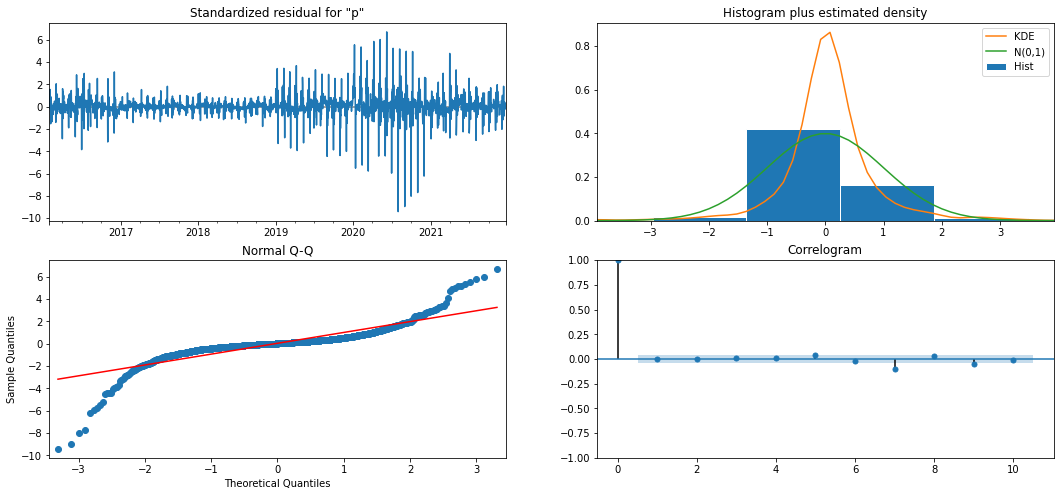

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

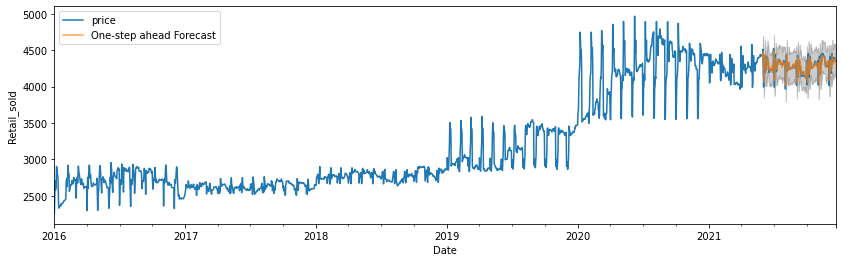

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2021-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

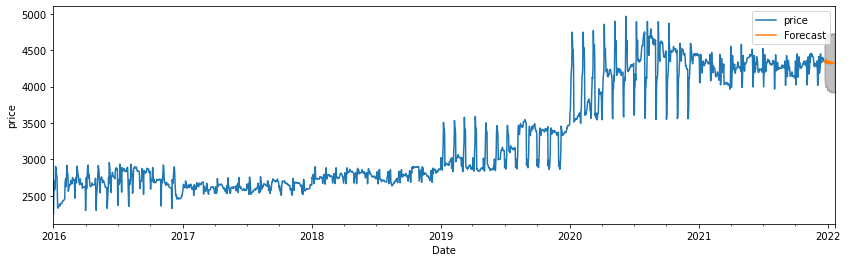

In [ ]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('price')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = df['2022-12-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.head(30)

2021-06-01    4395.397216
2021-06-02    4480.117009
2021-06-03    4242.086573
2021-06-04    4062.724653
2021-06-05    4178.688412
2021-06-06    4253.102334
2021-06-07    4428.163528
2021-06-08    4307.638113
2021-06-09    4220.759867
2021-06-10    4274.146118
2021-06-11    4220.789683
2021-06-12    4347.600801
2021-06-13    4272.596129
2021-06-14    4416.327717
2021-06-15    4367.090289
2021-06-16    4361.302838
2021-06-17    4320.876550
2021-06-18    4230.426906
2021-06-19    4225.710440
2021-06-20    4218.880018
2021-06-21    4213.582060
2021-06-22    4253.405996
2021-06-23    4236.385757
2021-06-24    4236.472398
2021-06-25    4217.612435
2021-06-26    4288.823205
2021-06-27    4284.447828
2021-06-28    4246.998524
2021-06-29    4233.750628
2021-06-30    4203.786039
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
df

,price
month,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [ ]:
y_truth.head(30)

,price
month,
2021-06-01,4512.6
2021-06-02,4238.8
2021-06-03,3995.4
2021-06-04,4111.6
2021-06-05,4287.7
2021-06-06,4426.4
2021-06-07,4313.3
2021-06-08,4196.8
2021-06-09,4280.0


In [ ]:
pred_ci.head(30)

,lower price,upper price
2021-12-22,4134.289933,4562.961482
2021-12-23,4049.816055,4616.996912
2021-12-24,4030.933295,4654.910881
2021-12-25,3993.873462,4658.585309
2021-12-26,3995.788078,4686.924236
2021-12-27,4017.976666,4728.020743
2021-12-28,3989.411068,4713.523305
2021-12-29,3967.205460,4702.269931
2021-12-30,3944.913063,4688.853801
2021-12-31,3959.718691,4711.117570


In [ ]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2021-12-22    4348.625707
2021-12-23    4333.406484
2021-12-24    4342.922088
2021-12-25    4326.229385
2021-12-26    4341.356157
2021-12-27    4372.998704
2021-12-28    4351.467186
2021-12-29    4334.737695
2021-12-30    4316.883432
2021-12-31    4335.418131
2022-01-01    4351.048221
2022-01-02    4337.455893
2022-01-03    4335.262118
2022-01-04    4313.361966
2022-01-05    4334.898843
2022-01-06    4323.023806
2022-01-07    4332.094593
2022-01-08    4345.020100
2022-01-09    4323.972897
2022-01-10    4320.758252
2022-01-11    4310.936454
2022-01-12    4324.821336
2022-01-13    4337.685566
2022-01-14    4332.530759
2022-01-15    4329.155365
2022-01-16    4321.933735
2022-01-17    4328.009055
2022-01-18    4328.719033
2022-01-19    4325.267460
2022-01-20    4315.708818
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
forecast

2021-12-22    4348.625707
2021-12-23    4333.406484
2021-12-24    4342.922088
2021-12-25    4326.229385
2021-12-26    4341.356157
2021-12-27    4372.998704
2021-12-28    4351.467186
2021-12-29    4334.737695
2021-12-30    4316.883432
2021-12-31    4335.418131
2022-01-01    4351.048221
2022-01-02    4337.455893
2022-01-03    4335.262118
2022-01-04    4313.361966
2022-01-05    4334.898843
2022-01-06    4323.023806
2022-01-07    4332.094593
2022-01-08    4345.020100
2022-01-09    4323.972897
2022-01-10    4320.758252
2022-01-11    4310.936454
2022-01-12    4324.821336
2022-01-13    4337.685566
2022-01-14    4332.530759
2022-01-15    4329.155365
2022-01-16    4321.933735
2022-01-17    4328.009055
2022-01-18    4328.719033
2022-01-19    4325.267460
2022-01-20    4315.708818
Freq: D, Name: predicted_mean, dtype: float64

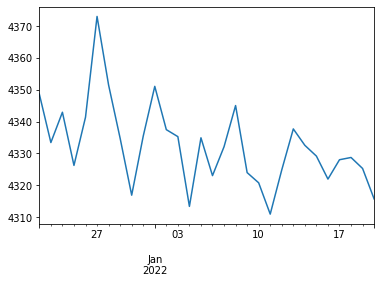

In [ ]:
forecast.plot()